In [1]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [3]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()




In [4]:
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

FileNotFoundError: File b'../BES_analysis_data/W15_comb\\var_type.csv' does not exist

In [ ]:
# related variables!

# racismAmount

In [ ]:
["racismAmount","blackEquality","profile_ethnicity","discrim","preferMP","warm","embes","brit[A-Z]","likeBNP"]

In [26]:
search(BES_Panel, "warm")

# racismAmountW4

# blackEquality
# profile_ethnicity
# <party>LookAfterBA

# discrim (BME/White/Muslims/Christians)
# preferMP<>
# warm<>

# embesExpectationsGap, embesDiscrimination



# other forms of equality
# Brexit
# immigration
# authoritarianism



# brit[A-Z] (born here/live here/Christian)
# groupempathy1-4




# likeUKIP/Farage/Nuttall/ptvUKIP

warmDenmarkW7        7682
warmFranceW7         7682
warmPolandW7         7682
warmRomaniaW7        7682
warmGreeceW7         7682
warmSpainW7          7682
warmUKW7             7682
warmWhiteW11        30956
warmAsianW11        30956
warmBlackW11        30956
warmEasternW11       7691
warmSyriansW11       7691
warmIndianW11        7691
warmWCW11            7691
warmMCW11            7691
warmBenefitsW11      7691
warmPoorW11          7691
warmRichW11          7691
warmMuslimW11        7691
warmChristianW11     7691
warmJewishW11        7691
warmAtheistW11       7691
dtype: int64

In [31]:
match(BES_reduced_with_na, "brit[A-Z]")

britSpeakEnglishW11__Very important    30122
britCustomsW11__Very important         29682
britBornHereW11__Very important        29511
britFeelBritishW11__Very important     29175
britCitizenW11__Very important         29338
britLiveHereW11__Very important        29284
britRespectLawW11__Very important      29939
britChristianW11__Very important       29113
dtype: int64

In [38]:
BES_reduced_with_na[search(BES_reduced_with_na, "BNP").index].var()

likeBNPW1__Strongly like                                       4.086949
ptvBNPW1__Very likely                                          3.875794
likeBNPW2__Strongly like                                       4.220129
ptvBNPW2__Very likely                                          3.178559
likeBNPW3__Strongly like                                       3.602190
ptvBNPW3__Very likely                                          3.292947
likeBNPW4__Strongly like                                       3.440027
ptvBNPW4__Very likely                                          3.046615
likeBNPW5__Strongly like                                       3.293245
ptvBNPW5__Very likely                                          2.900925
likeBNPW6__Strongly like                                       2.867620
ptvBNPW6__Very likely                                          2.461576
bestOnMIIW1_British National Party (BNP)                       0.015399
generalElectionVoteW1_British National Party (BNP)             0

In [39]:
likeBNP = amalgamate_waves(BES_reduced_with_na,"likeBNP",forward_fill=False)

Amalgamating variables: 
{1: 'likeBNPW1__Strongly like', 2: 'likeBNPW2__Strongly like', 3: 'likeBNPW3__Strongly like', 4: 'likeBNPW4__Strongly like', 5: 'likeBNPW5__Strongly like', 6: 'likeBNPW6__Strongly like'} ['likeBNPW1__Strongly like', 'likeBNPW2__Strongly like', 'likeBNPW3__Strongly like', 'likeBNPW4__Strongly like', 'likeBNPW5__Strongly like', 'likeBNPW6__Strongly like']


In [40]:
BES_reduced_with_na["likeBNP"] = likeBNP

In [33]:
discrimBME = amalgamate_waves(BES_reduced_with_na,"discrimBME")
BES_reduced_with_na["discrimBME"] = discrimBME

Amalgamating variables: 
{10: 'discrimBMEW10__A lot of discrimination against', 14: 'discrimBMEW14__A lot of discrimination against'} ['discrimBMEW10__A lot of discrimination against', 'discrimBMEW14__A lot of discrimination against']


In [22]:
blackEquality_num = amalgamate_waves(BES_reduced_with_na,"blackEquality",
                                     specify_wave_order=[1,6,14])
BES_reduced_with_na["blackEquality_num"] = blackEquality_num

Amalgamating variables: 
{14: 'blackEquality2W14__Gone much too far', 1: 'blackEqualityW1W2W3W4W5__Gone much too far', 6: 'blackEqualityW6_W12__Gone much too far'} ['blackEqualityW1W2W3W4W5__Gone much too far', 'blackEqualityW6_W12__Gone much too far', 'blackEquality2W14__Gone much too far']


In [24]:
# %%time

pattern = "blackEquality_num"
name = "blackEquality_num"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,r,p,N
blackEquality2W14__Gone much too far,1,0.00,4535
blackEqualityW6_W12__Gone much too far,1,0.00,52827
blackEqualityW1W2W3W4W5__Gone much too far,0.74,0.00,38638
gayEquality2W14__Gone much too far,0.67,0.00,4373
gayEqualityW6_W12__Gone much too far,0.61,0.00,52035
femaleEquality2W14__Gone much too far,0.59,0.00,4472
immigrantsWelfareStateW1__Strongly agree,0.55,0.00,28483
femaleEqualityW6_W12__Gone much too far,0.52,0.00,52958
gayEqualityW1W2W3W4W5__Gone much too far,0.51,0.00,38249
overseasAidW11__Strongly agree,0.5,0.00,28275


In [29]:
# %%time

pattern = "warmBlackW11__Very warm"
name = "warmBlackW11__Very warm"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


,r,p,N
warmAsianW11__Very warm,0.85,0.00,28159
warmWhiteW11__Very warm,0.64,0.00,28233
warmIndianW11__Very warm,0.61,0.00,6622
warmMuslimW11__Very warm,0.57,0.00,6587
warmSyriansW11__Very warm,0.56,0.00,6527
warmPoorW11__Very warm,0.55,0.00,6655
warmJewishW11__Very warm,0.55,0.00,6581
warmEasternW11__Very warm,0.54,0.00,6646
warmAtheistW11__Very warm,0.51,0.00,6644
warmWCW11__Very warm,0.5,0.00,6716


In [34]:
# %%time

pattern = "discrimBME"
name = "discrimBME"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


,r,p,N
discrimMuslimsW14__A lot of discrimination against,0.8,0.00,26449
discrimWomenW14__A lot of discrimination against,0.41,0.00,26118
immigCulturalW14__Enriches cultural life,0.39,0.00,26878
immigEconW13__Good for economy,0.36,0.00,22439
likeLucasW13__Strongly like,0.35,0.00,17481
immigSelfW14__Allow many more,0.35,0.00,26289
asylumMoreW13__Many more,0.34,0.00,22124
familiesMoreW13__Many more,0.34,0.00,21916
likeGrnW13__Strongly like,0.33,0.00,21684
preferMPEthnicW6__A lot more,0.33,0.00,3746


In [41]:
# %%time

pattern = "likeBNP"
name = "likeBNP"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


,r,p,N
ptvBNPW3__Very likely,0.64,0.00,5232
likeUKIPW1__Strongly like,0.51,0.00,14117
ukipGovTrustW5__ Would do a good job,0.45,0.00,19393
ptvUKIPW3__Very likely,0.44,0.00,5192
handleMIIUKIPW9__Very well,0.42,0.00,3503
likeFarageW5__Strongly like,0.41,0.00,19880
likeNuttallW13__Strongly like,0.4,0.00,9842
ptvUKIPExpW14__Very likely,0.38,0.00,1671
socialDistUKIPW7__Very happy,0.38,0.00,4609
immigrantsWelfareStateW11__Strongly agree,0.36,0.00,10749


In [44]:
base_vars = ["racismAmount","blackEquality","profile_ethnicity","discrim","preferMP","warm","embes","brit[A-Z]","likeBNP"]
var_list = []
for base in base_vars:
    var_list.extend(  list( match(BES_reduced_with_na, base).index )  )

In [45]:
var_list

['racismAmountW4__A lot',
 'blackEquality2W14__Gone much too far',
 'blackEqualityW1W2W3W4W5__Gone much too far',
 'blackEqualityW6_W12__Gone much too far',
 'blackEquality_num',
 'profile_ethnicity_White British',
 'profile_ethnicity_Any other white background',
 'profile_ethnicity_Indian',
 'profile_ethnicity_Other ethnic group',
 'profile_ethnicity_Pakistani',
 'profile_ethnicity_Chinese',
 'profile_ethnicity_Black African',
 'profile_ethnicity_Any other mixed background',
 'profile_ethnicity_White and Asian',
 'profile_ethnicity_Black Caribbean',
 'profile_ethnicity_Any other Asian background',
 'profile_ethnicity_White and Black Caribbean',
 'profile_ethnicity_Bangladeshi',
 'profile_ethnicity_White and Black African',
 'profile_ethnicity_Any other black background',
 'discrimMenW10__A lot of discrimination against',
 'discrimWomenW10__A lot of discrimination against',
 'discrimChristiansW10__A lot of discrimination against',
 'discrimMuslimsW10__A lot of discrimination against',


In [42]:
# Needed for Factor Analysis
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
BES_output_folder

'../BES_analysis_output/'

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


Warning, filename truncated because it was over 30. Filenames may no longer be unique
Wall time: 30.6 s


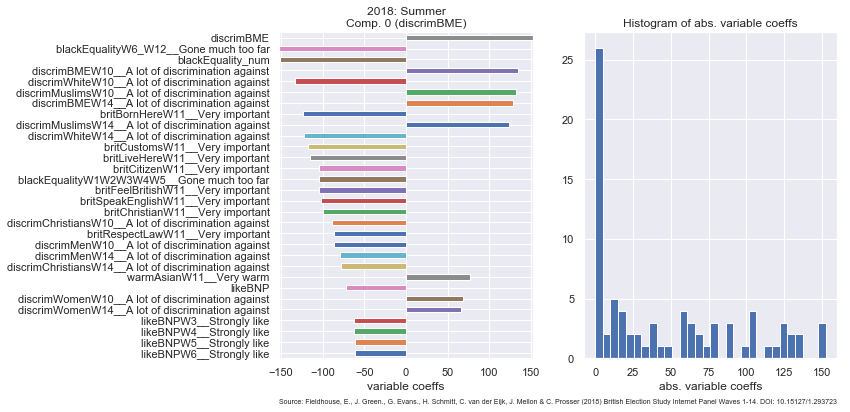

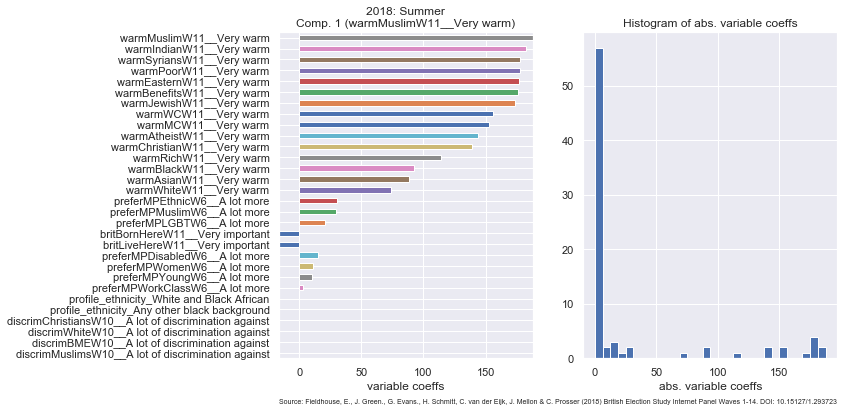

In [48]:
%%time

df = BES_reduced_with_na[var_list].copy()

df = df.fillna(df.mean())




output_subfolder = BES_output_folder+os.sep + "racism_fusion" + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )
    

# standardise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df.columns,
                             index   = df.index      )



n_components = BES_std.shape[1]
n_components = 2
alpha = 18
# decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp = SparsePCA(n_components = n_components, alpha = alpha)
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df.index)



load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method


# display_pca_data(n_components, decomp, BES_std)



(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df.columns, BES_decomp, manifest=manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 10, show_histogram = True)

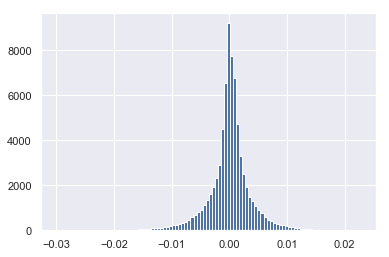

In [53]:
Racism = BES_decomp[0]
Racism.hist(bins=100);

In [55]:
racism_corrs = BES_reduced_with_na.corrwith(Racism)

In [57]:
racism_corrs.sort_values()

blackEquality2W14__Gone much too far                 -0.691284
discrimWhiteW10__A lot of discrimination against     -0.666142
blackEqualityW6_W12__Gone much too far               -0.651656
discrimWhiteW14__A lot of discrimination against     -0.642563
blackEquality_num                                    -0.627531
immigrantsWelfareStateW11__Strongly agree            -0.621139
britBornHereW11__Very important                      -0.598429
euPriorityBalanceW11__Control immigration            -0.596455
overseasAidW11__Strongly agree                       -0.586159
EUIntegrationSelfW11__Protect our independence       -0.584444
blackEqualityW1W2W3W4W5__Gone much too far           -0.576822
immigrantsWelfareStateW10__Strongly agree            -0.575156
euPriorityBalanceW10__Control immigration            -0.571442
euPriorityBalanceW13__Control immigration            -0.571056
immigrantsWelfareStateW7__Strongly agree             -0.567542
britLiveHereW11__Very important                      -0

In [58]:
search(BES_reduced_with_na, "english")

englishnessW1__Very strongly English     29603
englishnessW2__Very strongly English     29627
englishnessW3__Very strongly English     27525
englishnessW4__Very strongly English     30754
englishnessW7__Very strongly English     30398
englishnessW8__Very strongly English     32967
englishnessW9__Very strongly English     29631
englishnessW10__Very strongly English    29746
englishnessW11__Very strongly English    30399
britSpeakEnglishW11__Very important      30122
englishnessW12__Very strongly English     8767
englishnessW14__Very strongly English    30281
EUMIICategoryW7_english identity         22599
euMIISmallW7_British/english identity    21657
EUMIICategoryW8_english identity         16181
euMIISmallW8_British/english identity    15413
dtype: int64

In [65]:
racism_corrs.loc[search(BES_reduced_with_na, "BNP").index]

likeBNPW1__Strongly like                                      -0.464035
ptvBNPW1__Very likely                                         -0.340893
likeBNPW2__Strongly like                                      -0.501816
ptvBNPW2__Very likely                                         -0.257411
likeBNPW3__Strongly like                                      -0.549566
ptvBNPW3__Very likely                                         -0.277030
likeBNPW4__Strongly like                                      -0.519977
ptvBNPW4__Very likely                                         -0.245470
likeBNPW5__Strongly like                                      -0.511043
ptvBNPW5__Very likely                                         -0.246679
likeBNPW6__Strongly like                                      -0.504264
ptvBNPW6__Very likely                                         -0.244706
bestOnMIIW1_British National Party (BNP)                      -0.156853
generalElectionVoteW1_British National Party (BNP)            -0